In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [40]:
map_df = gpd.read_file('Climate_Ready_Boston_Social_Vulnerability.geojson')

In [41]:
#load in data
map_df

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length,geometry
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,6.661000e+05,6036.192907,"POLYGON ((-71.08997 42.34393, -71.09020 42.343..."
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,2.506124e+05,2176.592171,"POLYGON ((-71.08580 42.34334, -71.08505 42.342..."
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,2.343579e+05,2542.043078,"POLYGON ((-71.07251 42.35546, -71.07230 42.355..."
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,5.496140e+05,3224.573044,"POLYGON ((-71.07066 42.35186, -71.07046 42.351..."
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,4.665852e+05,3143.610637,"POLYGON ((-71.10114 42.34777, -71.10087 42.347..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,25025081800,4024571.84,92.3915,2898,1388,329,891,286,1263,1549,2820,1054.40,Roxbury,6.843967e+05,4191.466959,"POLYGON ((-71.07960 42.32417, -71.07941 42.324..."
176,177,25025081700,6819156.25,156.5463,3820,1599,715,1250,420,1552,1972,3746,1404.47,Roxbury,1.159715e+06,4789.149284,"POLYGON ((-71.08345 42.32866, -71.08337 42.328..."
177,178,25025081500,3619583.13,83.0942,2134,905,340,430,197,809,1006,1957,804.02,Roxbury,6.155343e+05,4824.790469,"POLYGON ((-71.08879 42.32423, -71.08902 42.323..."
178,179,25025081400,6678367.07,153.3142,3003,1462,268,314,283,791,1074,2318,1185.22,Jamaica Plain,1.135953e+06,6170.176383,"POLYGON ((-71.09535 42.33156, -71.09490 42.331..."


<AxesSubplot:>

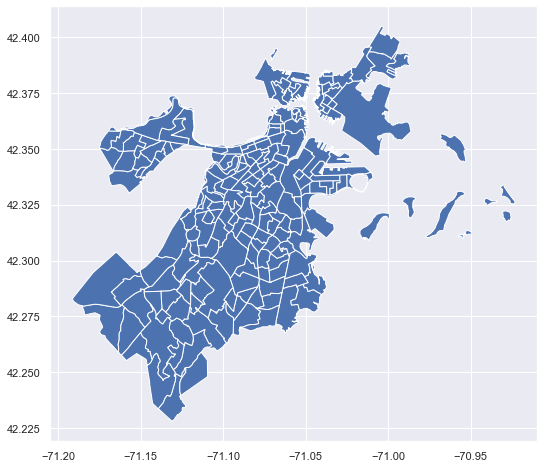

In [42]:
map_df.plot()

<AxesSubplot:>

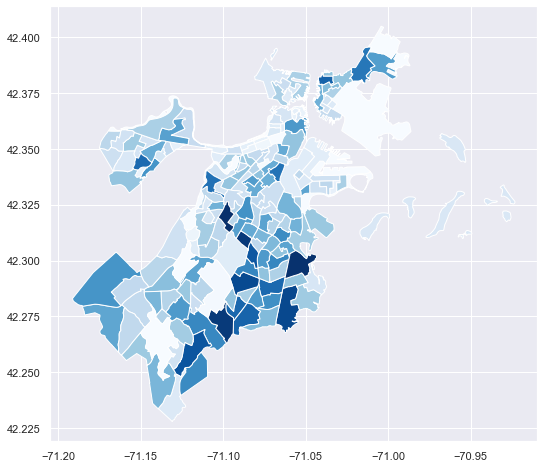

In [43]:
#plotting with disability as hue
map_df.plot(column= 'TotDis', cmap = "Blues")

In [44]:
def get_series(df, col, threshold, string_other='OTHER'):
    count_incidents=df[col].value_counts()
    mask = count_incidents > threshold
    tail_prob = count_incidents.loc[~mask].sum()
    count_incidents = count_incidents.loc[mask]
    count_incidents[string_other] = tail_prob
    return count_incidents 

<AxesSubplot:>

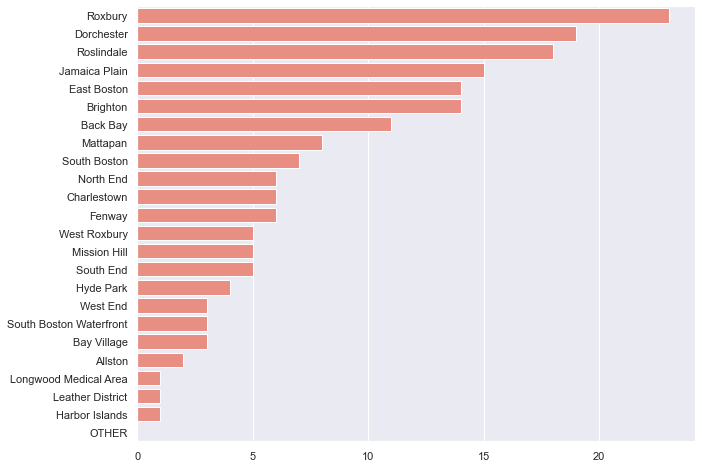

In [45]:
#different boston neighborhoods
incidents=get_series(map_df,'Name', 0)
sns.barplot(y=incidents.index, x=incidents.values, color="salmon")

In [46]:
map_with_rox = map_df.copy()

rox_yes = []

for i in map_with_rox['Name']:
    if i == 'Roxbury':
        rox_yes.append(1)
    else:
        rox_yes.append(0)

<AxesSubplot:>

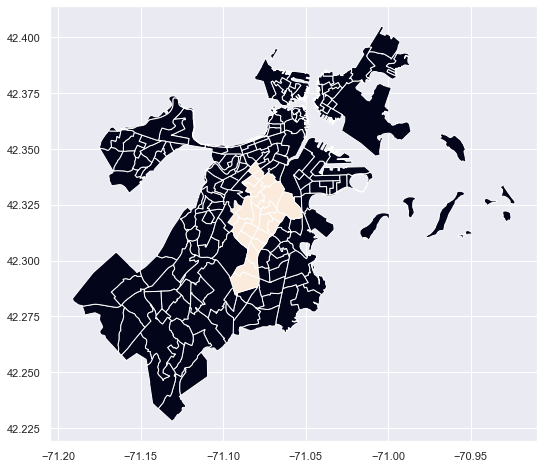

In [47]:
#show roxbury (most common neighborhood)
map_with_rox['Rox'] = rox_yes

map_with_rox.plot(column= 'Rox')

<AxesSubplot:>

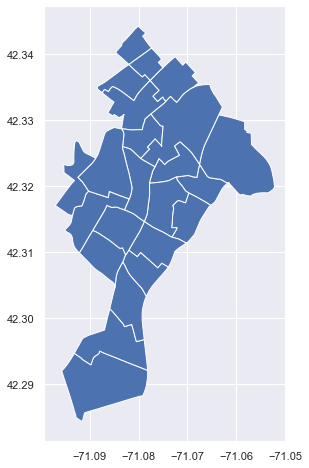

In [48]:
#zoomed in
map_rox = map_df.loc[map_df['Name'] == 'Roxbury']

map_rox.plot()

<AxesSubplot:>

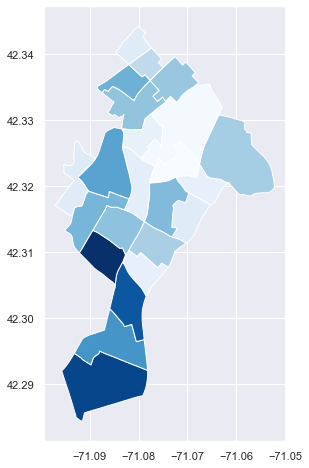

In [49]:
#toxbury weighted by disability
map_rox.plot(column= 'TotDis', cmap = 'Blues')

# Converting polygon object to (x,y) coords

In [50]:
from shapely.geometry import Polygon, mapping

In [51]:
poly_mapped = mapping(map_df['geometry'])

poly_coordinates = []

for i in range(len(poly_mapped['features'])):
    poly_coordinates.append(poly_mapped['features'][i]['geometry']['coordinates'][0])

In [52]:
xarray = []
yarray = []

for i in range(len(poly_coordinates)):
    x = []
    y = []
    
    for j in range(len(poly_coordinates[i])):
        if type(poly_coordinates[i][j][0]) != tuple:
            x.append(poly_coordinates[i][j][0])
            y.append(poly_coordinates[i][j][1])
        else:
            x.append(poly_coordinates[i][j][0][0])
            y.append(poly_coordinates[i][j][0][1])
        
    xarray.append(x)
    yarray.append(y)

(42.225, 42.45)

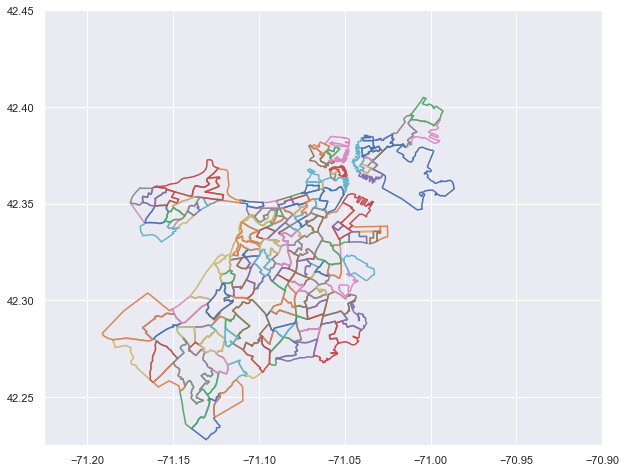

In [53]:
for i in range(180):
    plt.plot(xarray[i], yarray[i])

plt.xlim(-71.225, -70.90)
plt.ylim(42.225,42.45)

In [54]:
avg_x = []; avg_y = []
avg_p = []

for i in xarray:
    avg_x.append(np.mean(i))
   
    
for i in yarray:
    avg_y.append(np.mean(i))

for i in range(len(avg_x)):
    avg_p += [[avg_x[i], avg_y[i]]]

Text(0.5, 1.0, 'Centers of neighborhoods')

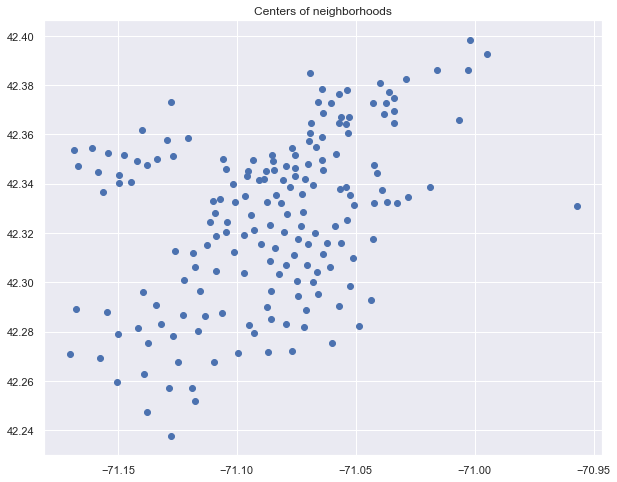

In [55]:
plt.scatter(avg_x, avg_y)
plt.title("Centers of neighborhoods")

In [56]:
map_df['center'] = avg_p

<AxesSubplot:>

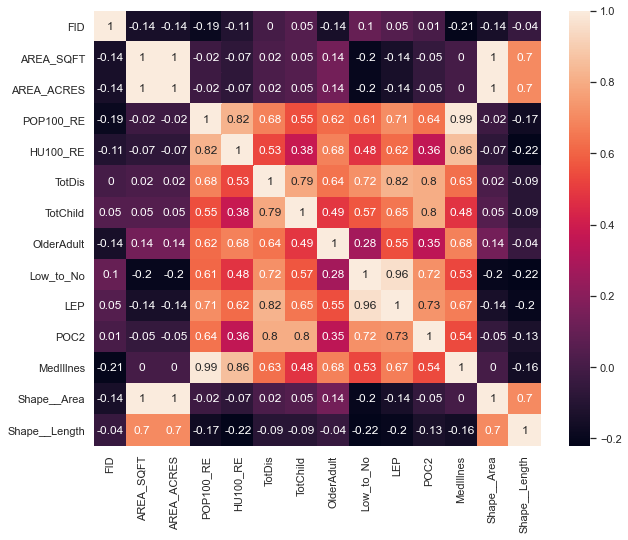

In [57]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,8)})

# compute the pair wise correlation for all columns  
correlation_matrix = map_df.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

weight of each point = 0.61 population + 0.72 disabiity + 0.57 children + 0.96 LEP + 0.72 POC + 0.53 medical illness

In [58]:
weight = (0.61*map_df['POP100_RE'] + 0.72*map_df['TotDis'] + 0.57*map_df['TotChild'] + 
          0.96*map_df['LEP'] + 0.72*map_df['POC2'] + 0.53*map_df['MedIllnes'])

In [59]:
map_df['weight'] = weight

<AxesSubplot:>

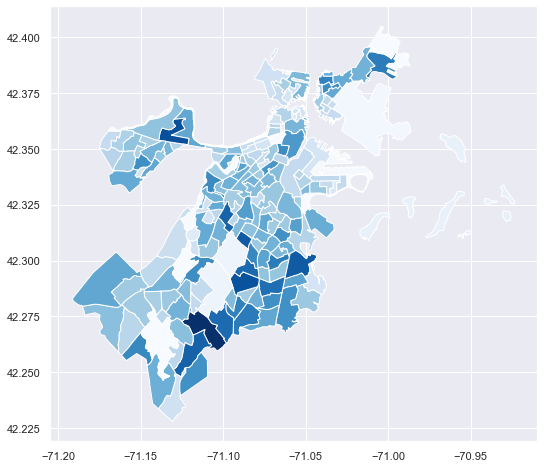

In [60]:
map_df.plot(column= 'weight', cmap = "Blues")

# Areas in need

In [61]:
most_needed = map_df.loc[map_df['weight'] == max(weight)]
most_needed

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length,geometry,center,weight
18,19,25025140400,20351684.25,467.2104,7650,2906,760,1839,1019,1654,2673,6984,2980.22,Roslindale,3.455347e+06,11303.203497,"POLYGON ((-71.11534 42.27805, -71.11453 42.277...","[-71.10942065199481, 42.2676781811311]",15436.0066


In [62]:
most_needed = map_df.loc[map_df['Name'] == 'Roslindale']
most_needed

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length,geometry,center,weight
15,16,25025110607,12606722.98,289.4105,5077,2227,486,772,987,675,1662,992,2177.40,Roslindale,2.141805e+06,8391.048820,"POLYGON ((-71.12308 42.29374, -71.12281 42.293...","[-71.13405453397411, 42.29075001910774]",7350.7120
18,19,25025140400,20351684.25,467.2104,7650,2906,760,1839,1019,1654,2673,6984,2980.22,Roslindale,3.455347e+06,11303.203497,"POLYGON ((-71.11534 42.27805, -71.11453 42.277...","[-71.10942065199481, 42.2676781811311]",15436.0066
29,30,25025130300,15522347.97,356.3441,4419,1811,297,1004,690,188,878,742,1752.17,Roslindale,2.636226e+06,7428.263297,"POLYGON ((-71.14775 42.28666, -71.14775 42.286...","[-71.1500209578804, 42.279002345386736]",5787.4801
30,31,25025130200,14558816.72,334.2244,4506,1914,301,872,746,192,938,593,1874.69,Roslindale,2.473224e+06,7321.329140,"POLYGON ((-71.14938 42.29310, -71.14899 42.292...","[-71.15471564743233, 42.28793778161261]",5783.4457
36,37,25025110601,15228405.80,349.5961,2969,1295,335,443,843,159,1002,389,1341.12,Roslindale,2.587678e+06,6922.910203,"POLYGON ((-71.12793 42.30017, -71.12807 42.300...","[-71.13965811345629, 42.29597669141351]",4257.5936
37,38,25025110502,7365204.55,169.0818,3806,1684,347,659,461,481,942,1736,1504.48,Roslindale,1.251013e+06,5165.092826,"POLYGON ((-71.12513 42.28450, -71.12594 42.283...","[-71.1317291270974, 42.283172409256096]",5898.7444
38,39,25025110501,6972865.51,160.0750,3253,1371,529,840,501,638,1139,954,1283.32,Roslindale,1.184344e+06,4846.055452,"POLYGON ((-71.13700 42.27833, -71.13715 42.278...","[-71.1417235247537, 42.28154866844037]",5304.4896
39,40,25025110401,5623201.08,129.0909,3566,1362,440,853,303,985,1288,2449,1298.43,Roslindale,9.552317e+05,4296.614857,"POLYGON ((-71.11928 42.29024, -71.11930 42.290...","[-71.12271250913689, 42.286704313139474]",6666.1979
43,44,25025101001,14014997.85,321.7401,5480,2266,1098,1136,698,1518,2216,5347,2163.21,Roslindale,2.379706e+06,8259.199541,"POLYGON ((-71.09793 42.28127, -71.09802 42.281...","[-71.09956114001726, 42.271286429166274]",11904.5813
51,52,25025110103,10064472.96,231.0485,5460,2353,624,1264,357,1584,1941,3322,2036.89,Roslindale,1.710210e+06,9686.156025,"POLYGON ((-71.11451 42.30165, -71.11421 42.301...","[-71.11541337209835, 42.29663658462675]",9835.1117


<AxesSubplot:>

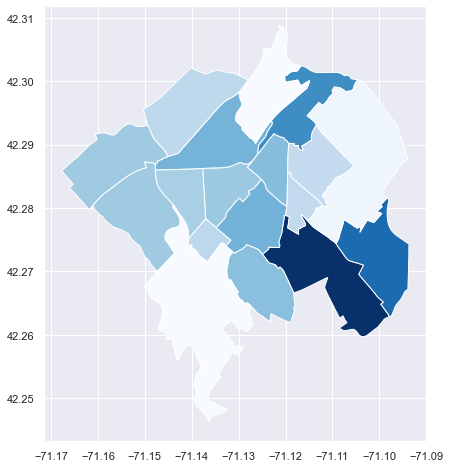

In [63]:
most_needed.plot(column = 'weight', cmap = 'Blues')

<AxesSubplot:>

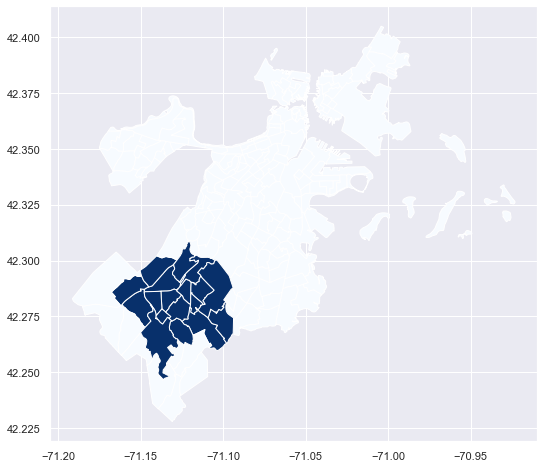

In [64]:
map_with_roslindale = map_df.copy()

ros_yes = []

for i in map_with_rox['Name']:
    if i == 'Roslindale':
        ros_yes.append(1)
    else:
        ros_yes.append(0)
        


map_with_roslindale['is_roslindale'] = ros_yes

map_with_roslindale.plot(column= 'is_roslindale', cmap = 'Blues')

In [65]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [66]:
map_df

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length,geometry,center,weight
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,6.661000e+05,6036.192907,"POLYGON ((-71.08997 42.34393, -71.09020 42.343...","[-71.09057015565259, 42.341520096231285]",7595.2866
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,2.506124e+05,2176.592171,"POLYGON ((-71.08580 42.34334, -71.08505 42.342...","[-71.08859303683678, 42.341895450330284]",8578.7042
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,2.343579e+05,2542.043078,"POLYGON ((-71.07251 42.35546, -71.07230 42.355...","[-71.07687147502307, 42.35434333840381]",3327.4628
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,5.496140e+05,3224.573044,"POLYGON ((-71.07066 42.35186, -71.07046 42.351...","[-71.07556191145268, 42.35158675013662]",2766.4660
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,4.665852e+05,3143.610637,"POLYGON ((-71.10114 42.34777, -71.10087 42.347...","[-71.10466537724, 42.34581734245919]",4305.4434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,25025081800,4024571.84,92.3915,2898,1388,329,891,286,1263,1549,2820,1054.40,Roxbury,6.843967e+05,4191.466959,"POLYGON ((-71.07960 42.32417, -71.07941 42.324...","[-71.08007432265386, 42.320480028843924]",6588.8020
176,177,25025081700,6819156.25,156.5463,3820,1599,715,1250,420,1552,1972,3746,1404.47,Roxbury,1.159715e+06,4789.149284,"POLYGON ((-71.08345 42.32866, -71.08337 42.328...","[-71.0858452057147, 42.32342521190124]",8892.1091
177,178,25025081500,3619583.13,83.0942,2134,905,340,430,197,809,1006,1957,804.02,Roxbury,6.155343e+05,4824.790469,"POLYGON ((-71.08879 42.32423, -71.08902 42.323...","[-71.09297604005138, 42.321158830042265]",4592.5706
178,179,25025081400,6678367.07,153.3142,3003,1462,268,314,283,791,1074,2318,1185.22,Jamaica Plain,1.135953e+06,6170.176383,"POLYGON ((-71.09535 42.33156, -71.09490 42.331...","[-71.0941952467779, 42.32719625131942]",5531.9366


In [67]:
X = map_df[['TotDis', 'TotChild', 'OlderAdult', 'Low_to_No', 'MedIllnes', 'LEP', 'POP100_RE', 'HU100_RE' ]]
#y = map_df[['Name']]

In [82]:
scaler = StandardScaler()
boston_scaled = scaler.fit_transform(X)

In [84]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

pca = decomposition.PCA(n_components=2)
boston_pca = pca.fit_transform(boston_scaled)
print("Variance explained by the principle components:", pca.explained_variance_ratio_)
print("Ratio of variance explained: ", sum(pca.explained_variance_ratio_))

Variance explained by the principle components: [0.69100457 0.13983991]
Ratio of variance explained:  0.8308444754572337


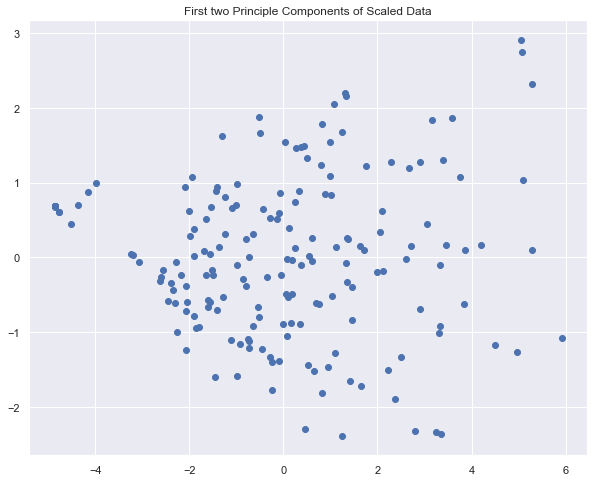

In [85]:
plt.figure()
plt.scatter(x=boston_pca[:,0], y=boston_pca[:,1])
plt.title("First two Principle Components of Scaled Data")
plt.show()

C:\Users\Sydnee O'Donnell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sydnee O'Donnell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sydnee O'Donnell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sydnee O'Donnell\AppData\Roaming\Python\

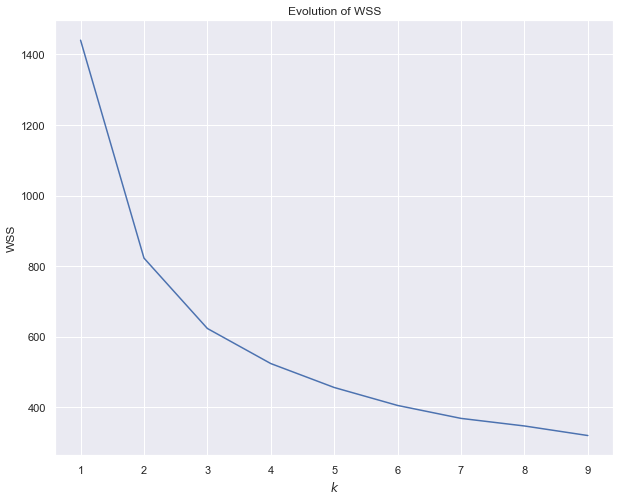

In [86]:
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(n_clusters=iter, random_state=2)
    kmeans.fit(boston_scaled)
    y_kmeans = kmeans.predict(boston_scaled)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS")
plt.xlabel("$k$")
plt.xticks(k)
plt.show()

C:\Users\Sydnee O'Donnell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


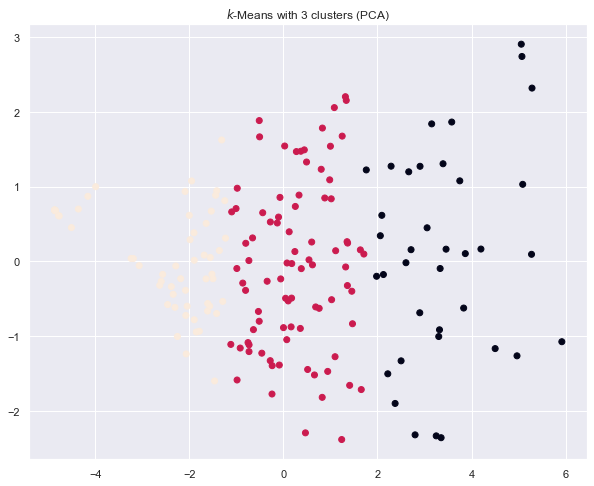

C:\Users\Sydnee O'Donnell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


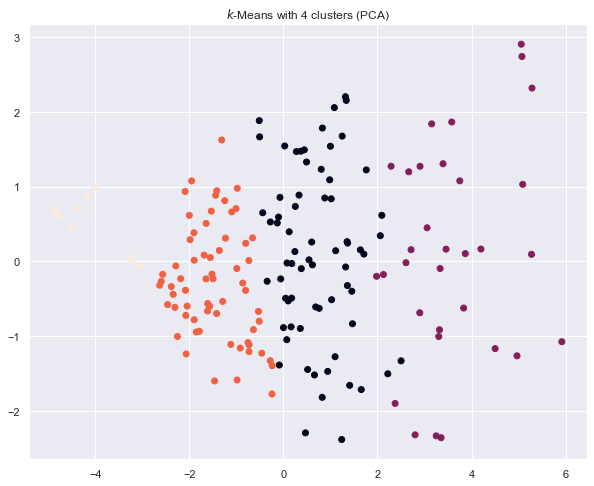

In [98]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(boston_scaled)
y_kmeans = kmeans.predict(boston_scaled)

plt.figure()
plt.scatter(x=boston_pca[:,0], y=boston_pca[:,1], c=y_kmeans)
plt.title("$k$-Means with 3 clusters (PCA)")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(boston_scaled)
y_kmeans = kmeans.predict(boston_scaled)
centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(x=boston_pca[:,0], y=boston_pca[:,1], c=y_kmeans)
plt.title("$k$-Means with 4 clusters (PCA)")
plt.show()

C:\Users\Sydnee O'Donnell\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


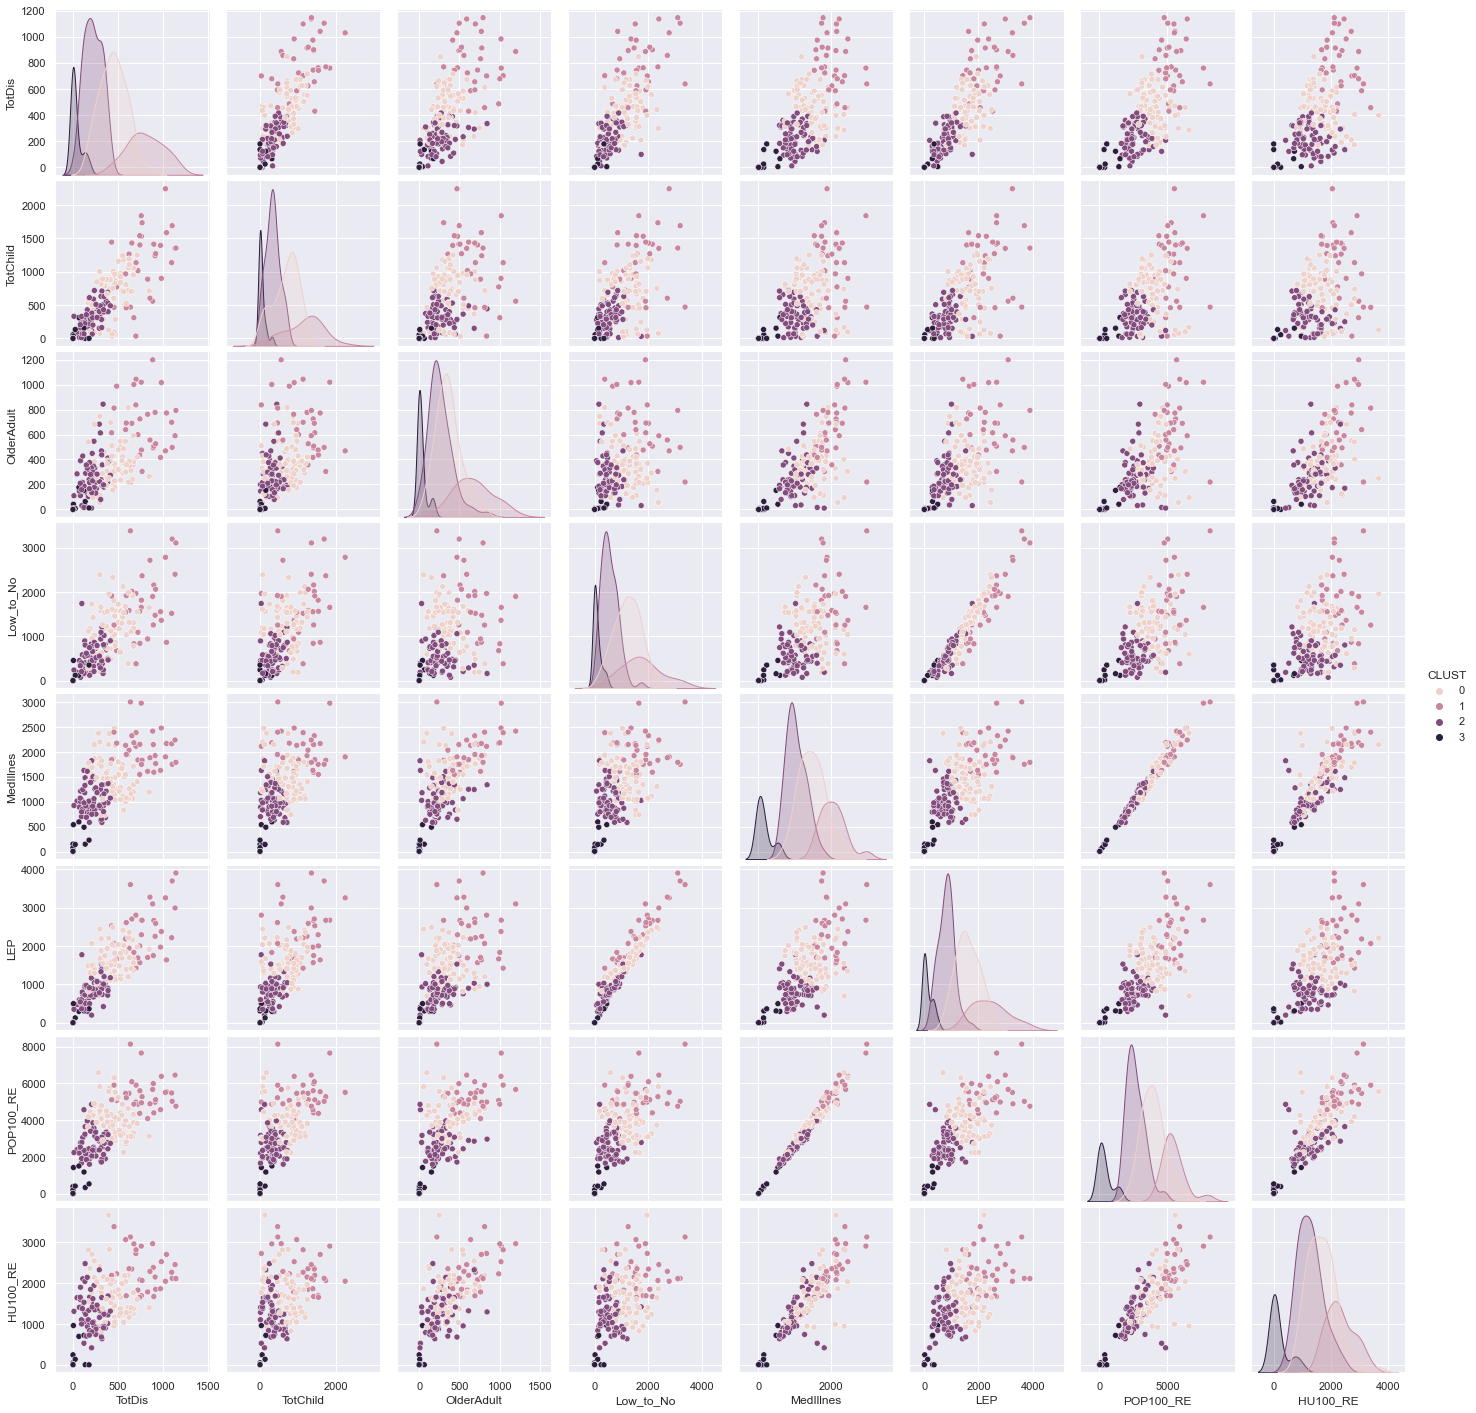

In [99]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(boston_scaled)
y_kmeans = kmeans.predict(boston_scaled)

boston_df_kmeans = X.copy()
boston_df_kmeans['CLUST'] = y_kmeans
sns.pairplot(boston_df_kmeans, hue='CLUST')

In [100]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,TotDis,TotChild,OlderAdult,Low_to_No,MedIllnes,LEP,POP100_RE,HU100_RE
0,0.194063,0.211801,0.043050,0.354652,0.295440,0.322522,0.329739,0.238789
1,1.536711,1.253204,1.330627,1.104884,1.237429,1.364768,1.266030,1.108384
2,-0.639997,-0.555751,-0.378123,-0.612756,-0.453176,-0.648627,-0.500898,-0.349135
3,-1.338204,-1.183557,-1.331725,-1.266015,-1.917774,-1.505747,-1.929858,-1.835083


In [101]:
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)

,TotDis,TotChild,OlderAdult,Low_to_No,MedIllnes,LEP,POP100_RE,HU100_RE
0,444.867647,677.794118,361.441176,1226.735294,1495.594559,1588.176471,3951.882353,1687.823529
1,805.218750,1151.562500,672.562500,1752.687500,2067.191250,2425.250000,5430.562500,2321.562500
2,221.015625,328.609375,259.671875,548.531250,1041.336406,808.203125,2640.062500,1259.359375
3,33.625000,43.000000,29.250000,90.562500,152.621875,119.812500,383.312500,176.437500


In [102]:
y_kmeans.size

180

Text(0.5, 1.0, 'Centers of neighborhoods')

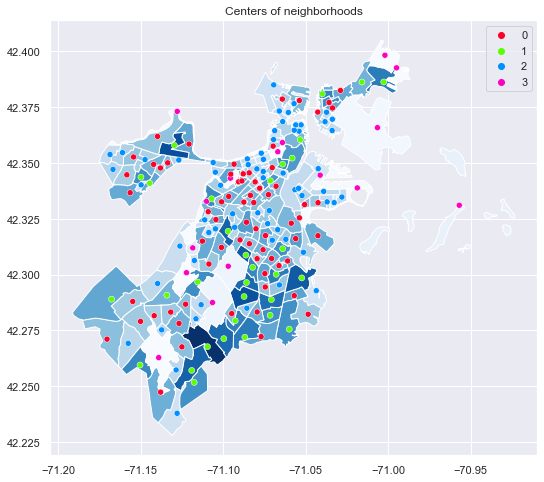

In [107]:
sns.set(rc={'figure.figsize':(10,8)})
map_df.plot(column= 'weight', cmap = "Blues")
sns.scatterplot(x = avg_x, y = avg_y, hue = y_kmeans, palette = 'gist_rainbow')
plt.title("Centers of neighborhoods")